# COVID-19 cases

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

In [3]:
files = ['time_series_covid19_confirmed_global.csv',
         'time_series_covid19_deaths_global.csv',
         'time_series_covid19_recovered_global.csv']

In [4]:
def get_data(base_url, file_names):
    
    # initialize dictionary
    data = dict()
    
    for file in files:
        
        # create file url
        url = base_url + file
        
        # extract variable from file name (i.e. 'Confirmed', 'Deaths' or 'Recovered')
        var = file.split('_')[3].capitalize()
        
        # read csv file from url
        data[var] = pd.read_csv(url)
        
        # drop columns
        data[var].drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
        
        # rename column
        data[var].rename(columns={'Country/Region':'Country'}, inplace=True)
        
        # group values by country
        data[var] = data[var].groupby(by='Country').sum().reset_index()
        
        # tidy data
        data[var] = pd.melt(data[var], id_vars=['Country'], var_name='Date', value_name='Cases')
        data[var]['Variable'] = var
        
        # convert strings to dates
        data[var]['Date'] = pd.to_datetime(data[var]['Date'], format='%m/%d/%y')
        
    return pd.concat(data.values())

In [5]:
df = get_data(base_url, files)

In [6]:
df.sample(n=7)

,Country,Date,Cases,Variable
1003,Diamond Princess,2020-01-27,0,Deaths
56550,Barbados,2020-11-13,234,Recovered
3869,Djibouti,2020-02-11,0,Recovered
35238,Kyrgyzstan,2020-07-24,31247,Confirmed
44365,Egypt,2020-09-10,81597,Recovered
20413,Syria,2020-05-07,45,Confirmed
57642,Serbia,2020-11-18,0,Recovered


In [7]:
df.loc[(df.Variable == 'Confirmed') & (df.Country == 'Netherlands'), ['Date', 'Cases']]

,Date,Cases
123,2020-01-22,0
314,2020-01-23,0
505,2020-01-24,0
696,2020-01-25,0
887,2020-01-26,0
...,...,...
66209,2021-01-02,825249
66400,2021-01-03,832702
66591,2021-01-04,839316
66782,2021-01-05,845822


In [8]:
nl_daily_confirmed = df.loc[(df.Variable == 'Confirmed') & (df.Country == 'Netherlands'), :].copy()
nl_daily_confirmed.Cases = nl_daily_confirmed.Cases - nl_daily_confirmed.Cases.shift(1)
nl_daily_confirmed.dropna(inplace=True)
nl_daily_confirmed.Cases = nl_daily_confirmed.Cases.astype(int)
nl_daily_confirmed.tail(5)

,Country,Date,Cases,Variable
66209,Netherlands,2021-01-02,8633,Confirmed
66400,Netherlands,2021-01-03,7453,Confirmed
66591,Netherlands,2021-01-04,6614,Confirmed
66782,Netherlands,2021-01-05,6506,Confirmed
66973,Netherlands,2021-01-06,7238,Confirmed


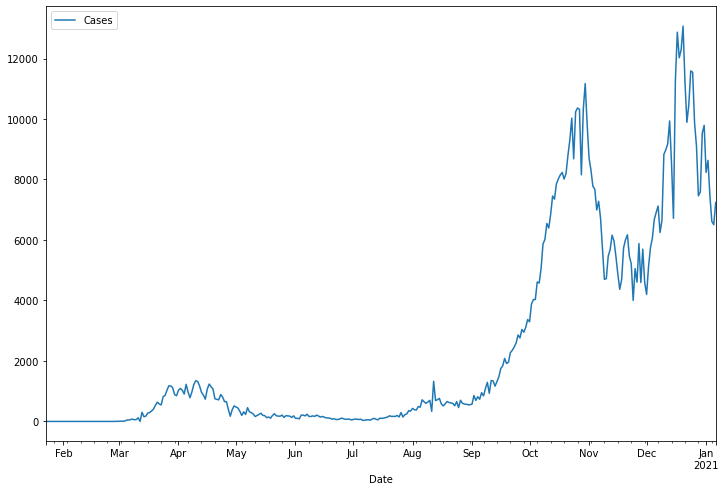

In [9]:
nl_daily_confirmed.plot(x='Date', y='Cases', kind='line', figsize=(12, 8))
plt.show()

<AxesSubplot:xlabel='Date'>

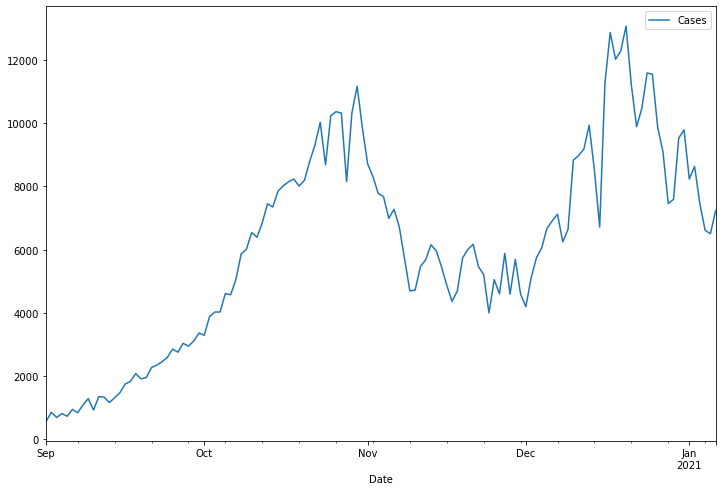

In [10]:
nl_daily_confirmed[nl_daily_confirmed.Date >= datetime.strptime('2020-09-01', '%Y-%m-%d')]\
.plot(x='Date', y='Cases', kind='line', figsize=(12, 8))